<a href="https://colab.research.google.com/github/lcipolina/escher/blob/master/ML/Real_ESRGAN_Inference_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-ESRGAN Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn) and [realsr-ncnn-vulkan](https://github.com/nihui/realsr-ncnn-vulkan) by [nihui](https://github.com/nihui).

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 558 (delta 22), reused 28 (delta 14), pack-reused 512
Receiving objects: 100% (558/558), 4.64 MiB | 11.34 MiB/s, done.
Resolving deltas: 100% (284/284), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 4.1 MB/s 
     |████████████████████████████████| 5.8 MB 22.1 MB/s 
     |████████████████████████████████| 185 kB 38.0 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194439 sha256=a84036059589da8df4085ecc9d92f41a271cda07774ea287b0a54685d06ed7d2
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 2.5 MB/s 
     |████████████████████████████████| 177 kB 8.7 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [2]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving p1-2.jpg to p1-2.jpg
move p1-2.jpg to upload/p1-2.jpg


# 3. Inference


In [6]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 2 --half --face_enhance
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

Testing 0 p1-2


# 4. Visualization

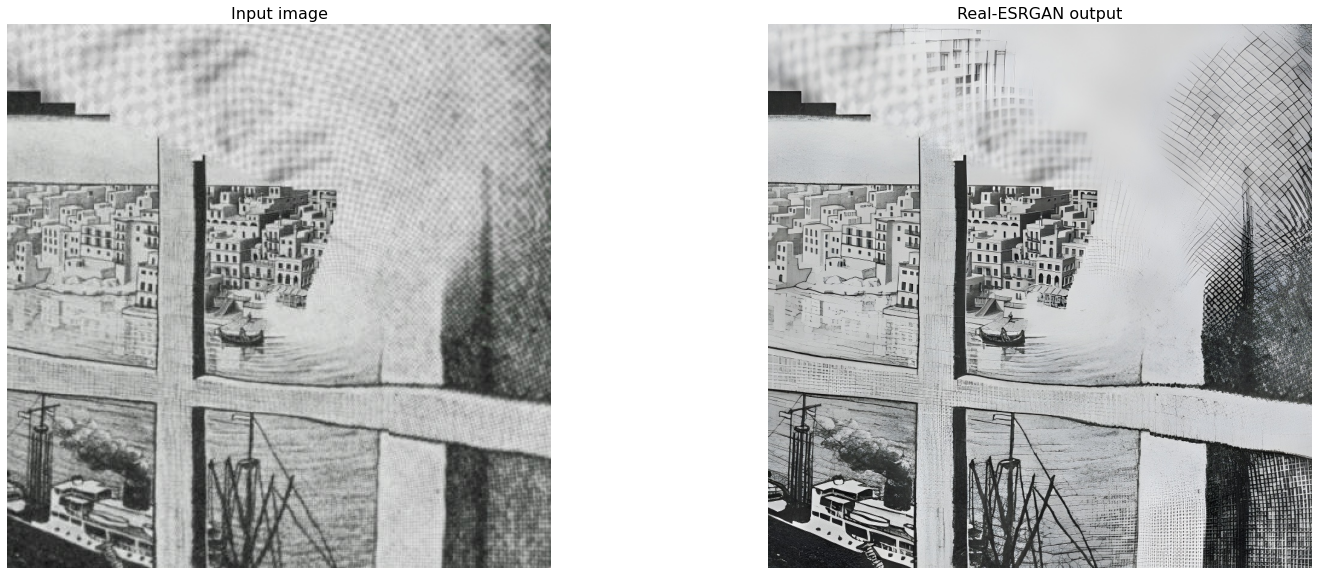

In [7]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [8]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>